# Importing Libraries

In [1]:
# Import the necessary libraries:

import pandas as pd
import numpy as np 
import re
import string
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from ast import literal_eval
import json
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

# Dataset Processing

In [2]:
# Load the datasets:

credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

The first dataset contains the following features:-

1. movie_id - A unique identifier for each movie.
2. title - Title of the movie.
2. cast - Names of the lead and supporting actors.
3. crew - Names of Director, Editor, Composer, Writer etc.

The second dataset has the following features:-

1. budget - The budget in which the movie was made.
2. genre - The genre of the movie, Action, Comedy ,Thriller etc.
3. homepage - A link to the homepage of the movie.
4. id - This is infact the movie_id as in the first dataset.
5. keywords - The keywords or tags related to the movie.
6. original_language - The language in which the movie was made.
7. original_title - The title of the movie before translation or adaptation.
8. overview - A brief description of the movie.
9. popularity - A numeric quantity specifying the movie popularity.
10. production_companies - The production house of the movie.
11. production_countries - The country in which it was produced.
12. release_date - The date on which it was released.
13. revenue - The worldwide revenue generated by the movie.
14. runtime - The running time of the movie in minutes.
15. spoken_languages - Languages in which the movie was released
16. status - "Released" or "Rumored".
17. tagline - Movie's tagline.
18. title - Title of the movie.
19. vote_average - average ratings the movie recieved.
20. vote_count - the count of votes recieved.

In [3]:
# Merge the two datasets on the "id" column

credits.columns = ['id','tittle','cast','crew']
movies = movies.merge(credits, on='id')

movies.head(5)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   169.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   148.0   
3  [{"name": "Legendary Pictures", "id": 923}, {"...  ...   165.0   
4        [{"name": "Walt Disney Pictures", "id": 2}]  ...   132.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3           [{"iso_639_1": "en", "name": "English"}]  Released   
4           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   
3                     The Dark Knight Rises          7.6       9106   
4                               John Carter          6.1       2124   

                                     tittle  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne /

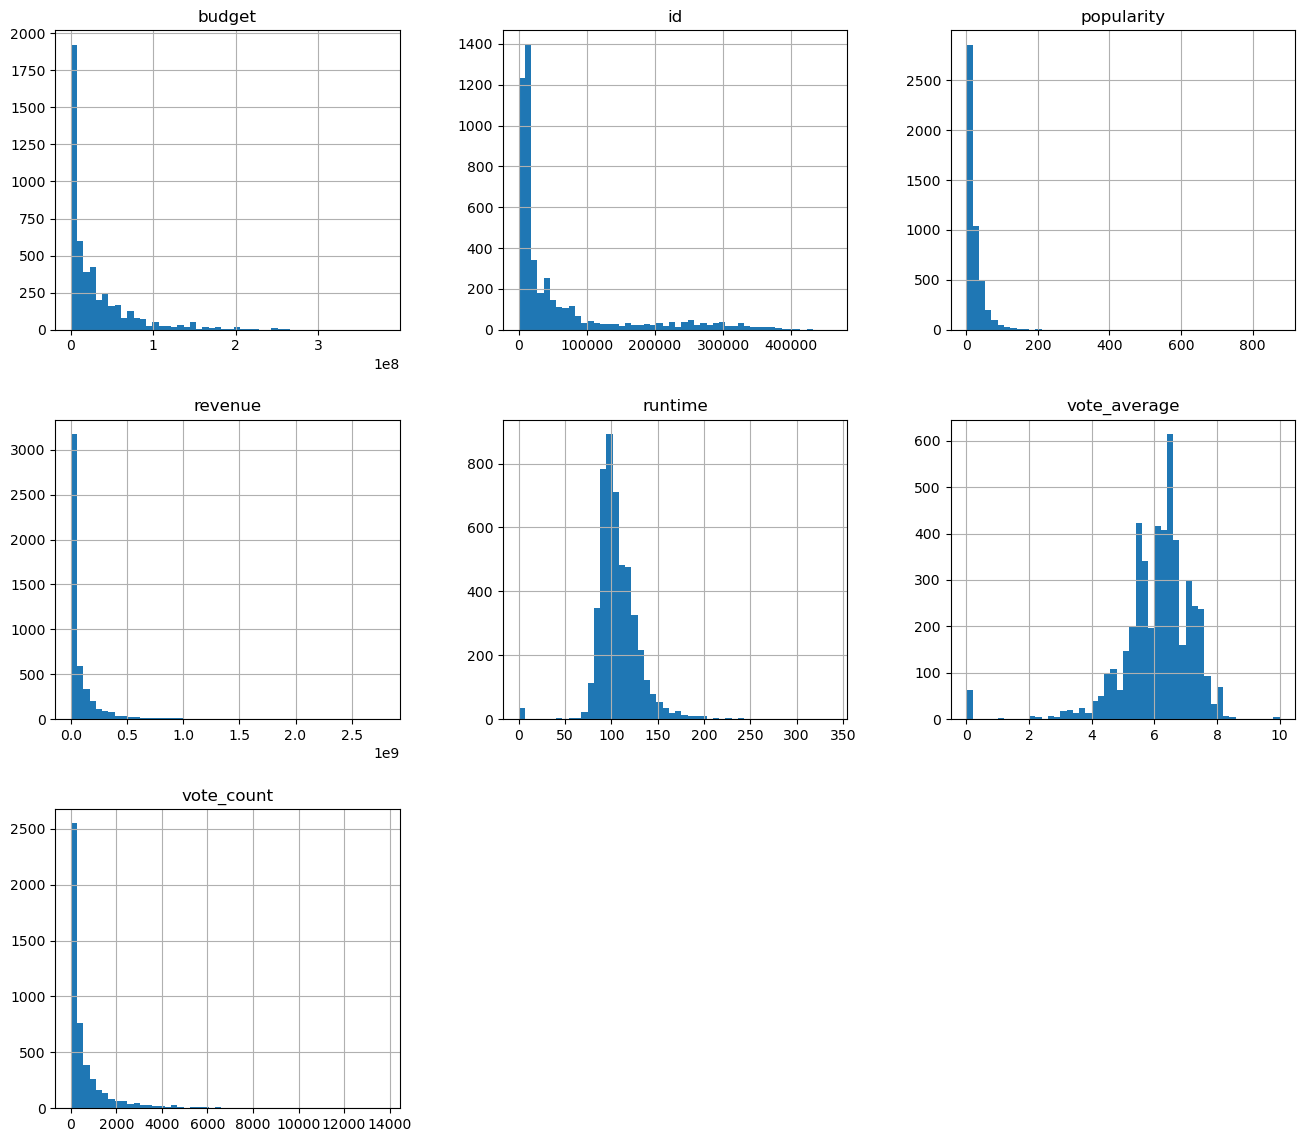

In [4]:
# Displaying histograms for each numerical attribute

movies.hist(bins = 50, figsize = (16, 14), )
plt.show()

From the above graphs, we can see the following:

1. Most of the numerical features are highly skewed, which could be due to blockbuster movies dominating over others.

2. Vote average is slightly skewed to left in contrast with most of the features.

# Types of Recommender Systems

## 1. Demographic Filtering

Demographic Filtering - Generalized recommendations are offered to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. This approach is considered to be too simple as each user is different, however, the central idea remains that movies that are more popular and critically acclaimed, will have a higher probability of being liked by audiences.

##### To get the most popular movies, we simply sort the dataset by the 'popularity" column, as follows:

Text(0.5, 1.0, 'Popular Movies')

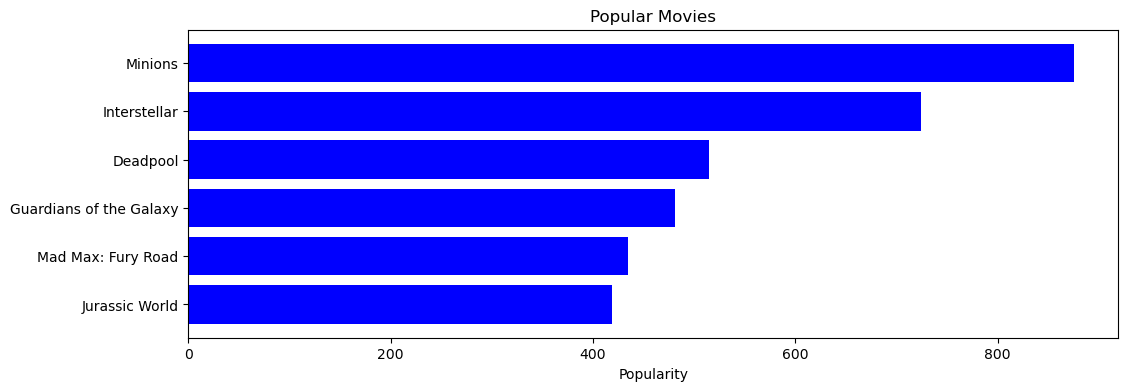

In [5]:
pop= movies.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='blue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

##### To get popular movies based on their budgets, we do the following:

Text(0.5, 1.0, 'High Budget Movies')

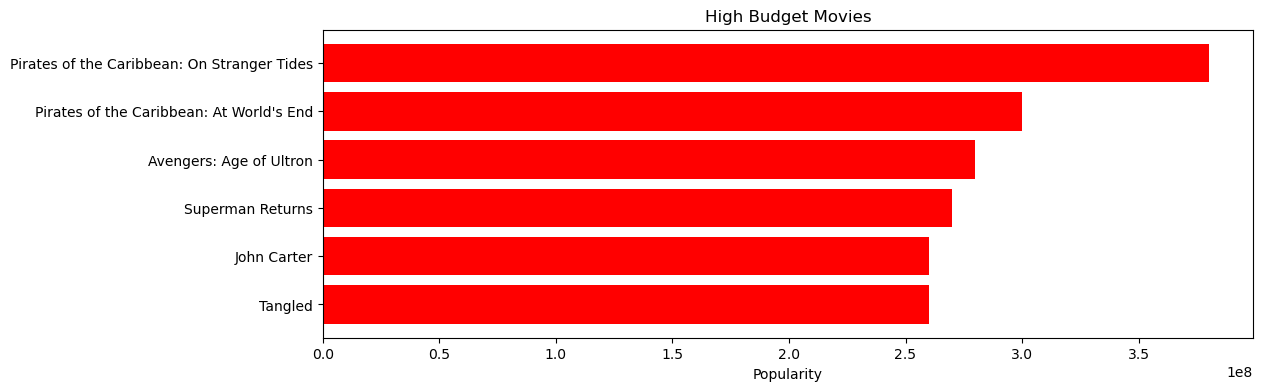

In [6]:
pop= movies.sort_values('budget', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['budget'].head(6), align='center',
        color='red')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("High Budget Movies" )

##### Similary, popular movies based on their revenue can be obtained in this fashion:

Text(0.5, 1.0, 'Revenue on Movies')

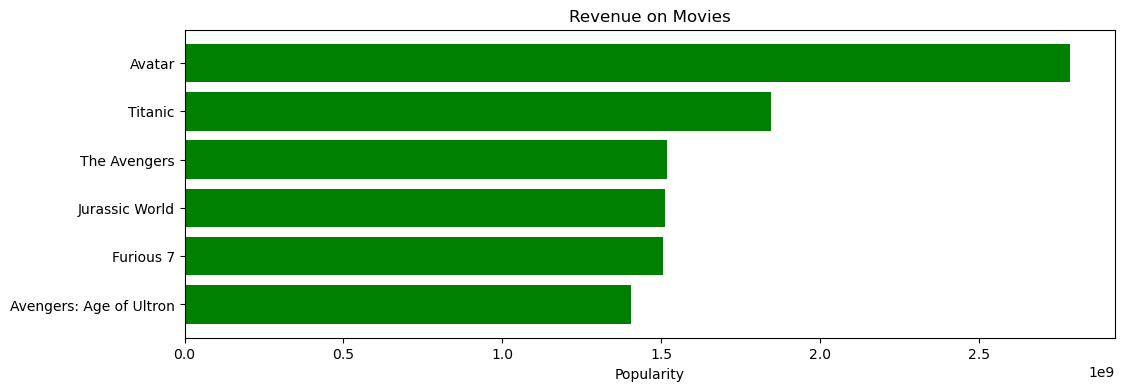

In [7]:
pop= movies.sort_values('revenue', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['revenue'].head(6), align='center',
        color='green')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Revenue on Movies" )

### Demographic Filtering Steps

For demographic filtering, we need a metric to rate a movie. These are the steps we need follow:

1. Calculate the score for every movie
2. Sort the scores and recommend the best rated movie to the users.
3. Since the average rating route won't be fair, as a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as average rating but 40 votes. To avoid this, we will be using weighted rating (WR), which is given as:

##### Weighted Rating (WR) = (v / (v + m)) * R + (m / (v + m)) * C

where,

v is the number of votes for the movie
m is the minimum votes required to be listed in the chart
R is the average rating of the movie
C is the mean vote across the whole report

##### We already have v(vote_count) and R (vote_average) and C can be calculated as follows:

In [8]:
C= movies['vote_average'].mean()
C

6.092171559442016

From the above, we can see that the mean rating for all the movies is approximately 6 on a scale of 10.The next step is to determine an appropriate value for "m", the minimum votes required to be listed in the chart. 

We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [9]:
m= movies['vote_count'].quantile(0.9)
m

1838.4000000000015

In [10]:
# Filter out the movies that qualify for the chart

q_movies = movies.copy().loc[movies['vote_count'] >= m]
q_movies.shape

(481, 23)

We see that there are 481 movies which qualify to be in this list. Next, we need to calculate our metric for each qualified movie. For this, we write a function, WR() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies as follows:

In [11]:
def WR(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Weighted Rating formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [12]:
# Define a new feature 'score' and calculate its value with "WR()"

q_movies['score'] = q_movies.apply(WR, axis=1)

Finally, we will sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [13]:
#Sort movies based on score calculated above

q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 10 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

title  vote_count  vote_average  \
1881                       The Shawshank Redemption        8205           8.5   
662                                      Fight Club        9413           8.3   
65                                  The Dark Knight       12002           8.2   
3232                                   Pulp Fiction        8428           8.3   
96                                        Inception       13752           8.1   
3337                                  The Godfather        5893           8.4   
95                                     Interstellar       10867           8.1   
809                                    Forrest Gump        7927           8.2   
329   The Lord of the Rings: The Return of the King        8064           8.1   
1990                        The Empire Strikes Back        5879           8.2   

         score  
1881  8.059258  
662   7.939256  
65    7.920020  
3232  7.904645  
96    7.863239  
3337  7.851236  
95    7.809479  
809   7.803188  
329   7.727243  
1990  7.697884

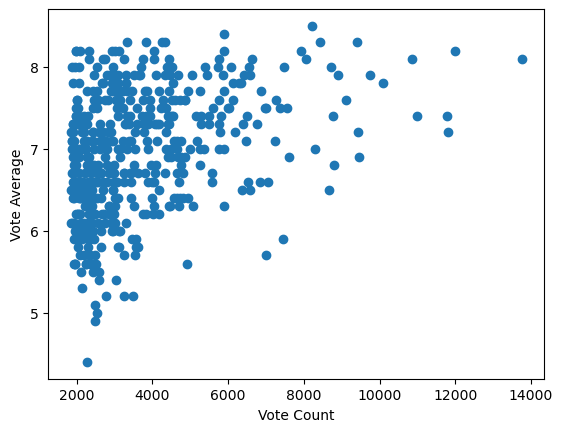

In [14]:
# Plot to show Vote Count v/s Vote Average

plt.figure()
plt.scatter(q_movies.vote_count, q_movies.vote_average)
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.show()

##### Conclusion: The above is a very basic recommender. Demographic recommender provides a general chart of recommended movies to all the users, but it's not sensitive to the interests and tastes of a particular user. This is when we move on to a more refined system - Content Basesd Filtering.

## 2. Content Based Filtering

In Content Based Filtering system, the content of the movie (overview, cast, crew, keyword etc.) is used to find its similarity with other movies, post which the movies are recommended.

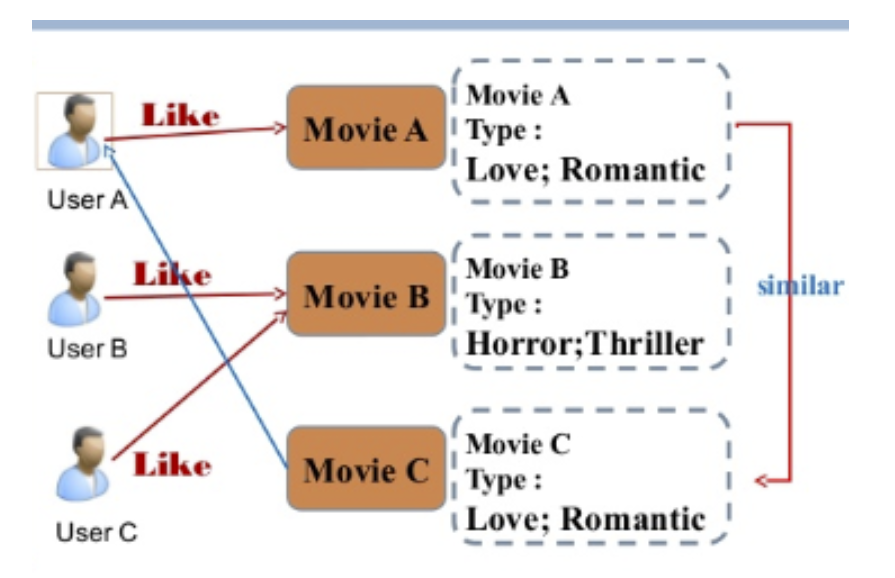

### 2A. Plot Based Recommender

In this approach within Content Based filtering, we can try to recommend movies based on the movie's plot description. This is given in the "overview" feature of the dataset, as shown below.

In [15]:
# Plot description is given in the "overview" feature / variable of the dataset:

movies['overview'].head(3)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
Name: overview, dtype: object

In order to do the text processing, we need to capture two things:

1. Term frequency (TF) - It is the relative frequency of a word in a document and is given as: term instances/total instances
2. Inverse Document Frequency (IDF) - is the relative count of documents containing the term and is given as: log(number of documents/documents with term) 

The overall importance of each word to the documents in which they appear is equal to TF * IDF

The result will be a matrix, where each column represents a word in the overview vocabulary and each row represents a movie. This is done to reduce the importance of words that occur frequently in plot overviews and their significance in computing the final similarity score.

In [16]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
movies['overview'] = movies['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

##### From the above, we see that over 20,000 different words were used to describe the 4803 movies in our dataset.

### Cosine Similarity

Cosine Similarity method is used to calculate a numeric quantity that denotes the similarity between two movies. We will make use of the Cosine Similarity score since it is independent of magnitude and relatively easy and fast to calculate. Mathematically, it is defined as follows:

##### cosine_similarity = (A . B) / (||A|| ||B||)

where A . B represents the dot product of A and B, and ||A|| and ||B|| represent the magnitudes of A and B, respectively.

We will use sklearn's linear_kernel() instead of cosine_similarities() function since it is faster. Also, since we have used the TF-IDF vectorizer above, calculating the dot product will directly give us the cosine similarity score.

In [17]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We need a mechanism to identify the index of a movie in our metadata DataFrame, given its title. To do this, we need a reverse mapping of movie titles and DataFrame indices.

In [18]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

For our Recommendation System, these are the following steps we'll follow:

1. Get the index of the movie given its title
2. Get the list of cosine similarity scores for that particular movie with all movies. 
3. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
4. Sort the list of tuples obtained in the above step based on the similarity scores.
5. Get the top 10 elements of this list. We will Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
6. Return the titles corresponding to the indices of the top elements.

In [19]:
# Function that takes title as an input and outputs the most similar movies:

def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    index = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    similarity_scores = list(enumerate(cosine_sim[index]))

    # Sort the movies based on the similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar movies
    similarity_scores = similarity_scores[1:6]

    # Get the movie indices
    movie_indices = [i[0] for i in similarity_scores]

    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]

### Recommendations Based on Plot Description  

In [20]:
get_recommendations('Harry Potter and the Half-Blood Prince')

114          Harry Potter and the Goblet of Fire
113    Harry Potter and the Order of the Phoenix
191     Harry Potter and the Prisoner of Azkaban
276      Harry Potter and the Chamber of Secrets
501                            The Little Prince
Name: title, dtype: object

In [21]:
get_recommendations('The Hobbit: The Battle of the Five Armies')

22            The Hobbit: The Desolation of Smaug
98              The Hobbit: An Unexpected Journey
1306                  Dragon Nest: Warriors' Dawn
342                                  Men in Black
113     Harry Potter and the Order of the Phoenix
Name: title, dtype: object

In [22]:
get_recommendations('The Avengers')

7       Avengers: Age of Ultron
3144                    Plastic
1715                    Timecop
4124         This Thing of Ours
3311      Thank You for Smoking
Name: title, dtype: object

##### Conclusion: As we can see from the examples above, the quality of recommendations is not that great, so we conclude that this is something we cannot capture using the present system.

### 2B. Metadata Based Recommender

The quality of our recommender would be increased with the usage of better metadata. We need to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords. We can extract these from the cast, crew and keywords features. For the first step, we need to parse our features, which are in the form of "stringified" lists, so we need to convert it into a safe and usable structure, as shown below.

In [23]:
# Parse the features into their corresponding python objects

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)

The below functions will help us extract the required information from each feature. For example, getting the "Director's" name from the "crew" feature etc.

In [24]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [25]:
# Function to return a list of top 3 elements or the entire list, whichever is more. For example, 3 cast members, 3 genres etc.

def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [26]:
# Define new director, cast, genres and keywords features that are in a suitable form

movies['director'] = movies['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(get_list)

In [27]:
# Print the new features of the first 3 films

movies[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                               cast        director  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]   James Cameron   
1     [Johnny Depp, Orlando Bloom, Keira Knightley]  Gore Verbinski   
2      [Daniel Craig, Christoph Waltz, Léa Seydoux]      Sam Mendes   

                              keywords                        genres  
0   [culture clash, future, space war]  [Action, Adventure, Fantasy]  
1   [ocean, drug abuse, exotic island]  [Adventure, Fantasy, Action]  
2  [spy, based on novel, secret agent]    [Action, Adventure, Crime]

We also need a method to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the names of two actors as the same entry, especially if they match. For example, Johnny of "Johnny Depp" and "Johnny Galecki" should be not considered as the same.

In [28]:
# Function to convert all strings to lower case and strip names of spaces

def convert_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [29]:
# Apply convert_data function to our features

features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    movies[feature] = movies[feature].apply(convert_data)

Next up, we need to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, directors, and keywords). We can do so using the soup function below.

In [30]:
def metadata_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
movies['soup'] = movies.apply(metadata_soup, axis=1)

The next steps from here are the same as what we did with our plot description based recommender. One important difference is that we use the CountVectorizer() instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies.

In [31]:
# Import CountVectorizer and create the count matrix

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies['soup'])

### Word Cloud

We will now set up a Wordcloud, which is a data visualization technique that displays the most frequent words in a given text as larger and more prominent words. It helps in two ways:

1. To quickly identify the most important themes or topics in the text. 
2. To easily visualize the most frequent and prominent words in a given text based on their frequency.

In [32]:
words = count.get_feature_names_out()
words

array(['17thcentury', '18thcentury', '1910s', ..., 'юлияснигирь', '卧底肥妈',
       '绝地奶霸'], dtype=object)

In [33]:
freqs = count_matrix.sum(axis=0).A1 # sum matrix into a 1D NumPy array
freqs

array([1, 1, 2, ..., 1, 1, 1], dtype=int64)

In [34]:
sorted_indices = freqs.argsort()[::-1] # Sort the words by frequency in descending order
words = [words[idx] for idx in sorted_indices]
freqs = freqs[sorted_indices]

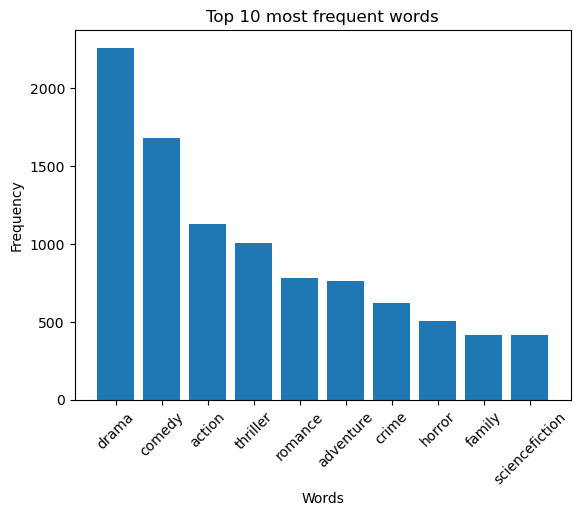

In [35]:
plt.bar(words[:10], freqs[:10])
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 most frequent words')
plt.show()

In [36]:
word_freqs = {}
for x in list(pd.DataFrame([words, freqs]).transpose().apply(lambda row: {row[0]: row[1]}, axis=1)):
    for key, val in x.items():
        word_freqs[key] = val

(-0.5, 999.5, 399.5, -0.5)

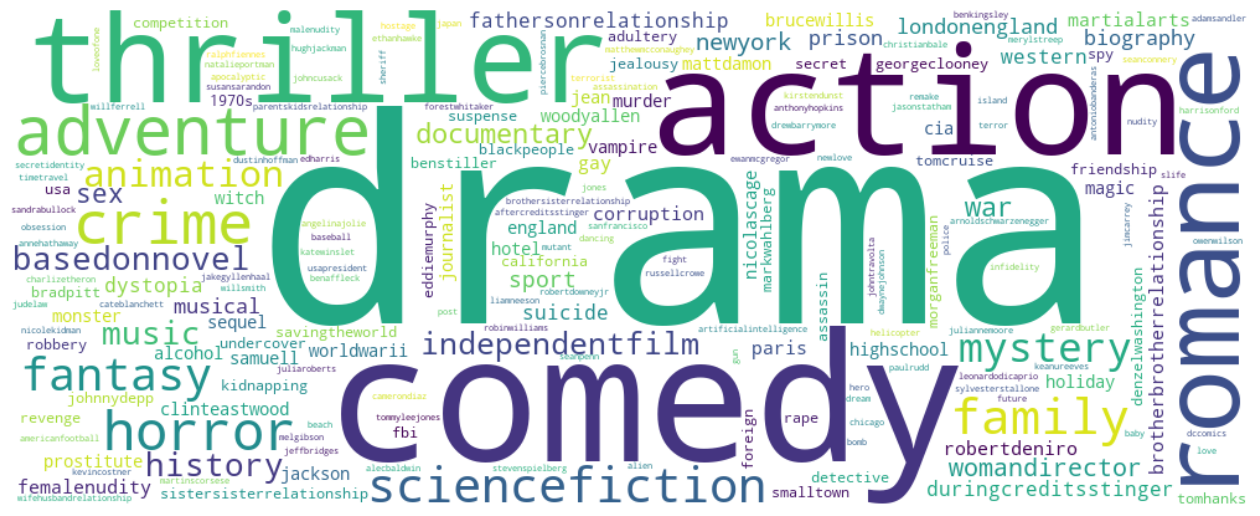

In [37]:
word_cloud = WordCloud(width=1000, height=400, background_color='white')
word_cloud.generate_from_frequencies(word_freqs)
plt.figure(figsize=(16, 8))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')

Next up, we will compute the Cosine Similarity Matrix based on the "count_matrix" we calculated before. We had previously ran Cosine Similarity on "TF-IDF" matrix.

In [38]:
# Compute the Cosine Similarity matrix based on the count_matrix

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [39]:
# Reset index of our main DataFrame and construct reverse mapping as before

movies = movies.reset_index()
indices = pd.Series(movies.index, index=movies['title'])

# PKL Files for Website Creation

Reason we choose Pickle (.pkl) files over .csv or .txt format is:

1. PKL is faster.
2. PKL can store any binary subject.
3. Pickle is a binary serialization format.

In [40]:
# Pickle files for the movies in a dictionary format

pickle.dump(movies.to_dict(),open('movie.pkl','wb'))

# Pickle files for similar movies for recommendation

pickle.dump(cosine_sim2,open('similarity.pkl','wb'))

### Recommendations Based on Metadata & Website Screenshots

We will now reuse our get_recommendations() function from above by passing in the new cosine_sim2 matrix as our second argument.

In [41]:
get_recommendations('Harry Potter and the Half-Blood Prince', cosine_sim2)

113    Harry Potter and the Order of the Phoenix
114          Harry Potter and the Goblet of Fire
197     Harry Potter and the Philosopher's Stone
276      Harry Potter and the Chamber of Secrets
191     Harry Potter and the Prisoner of Azkaban
Name: title, dtype: object

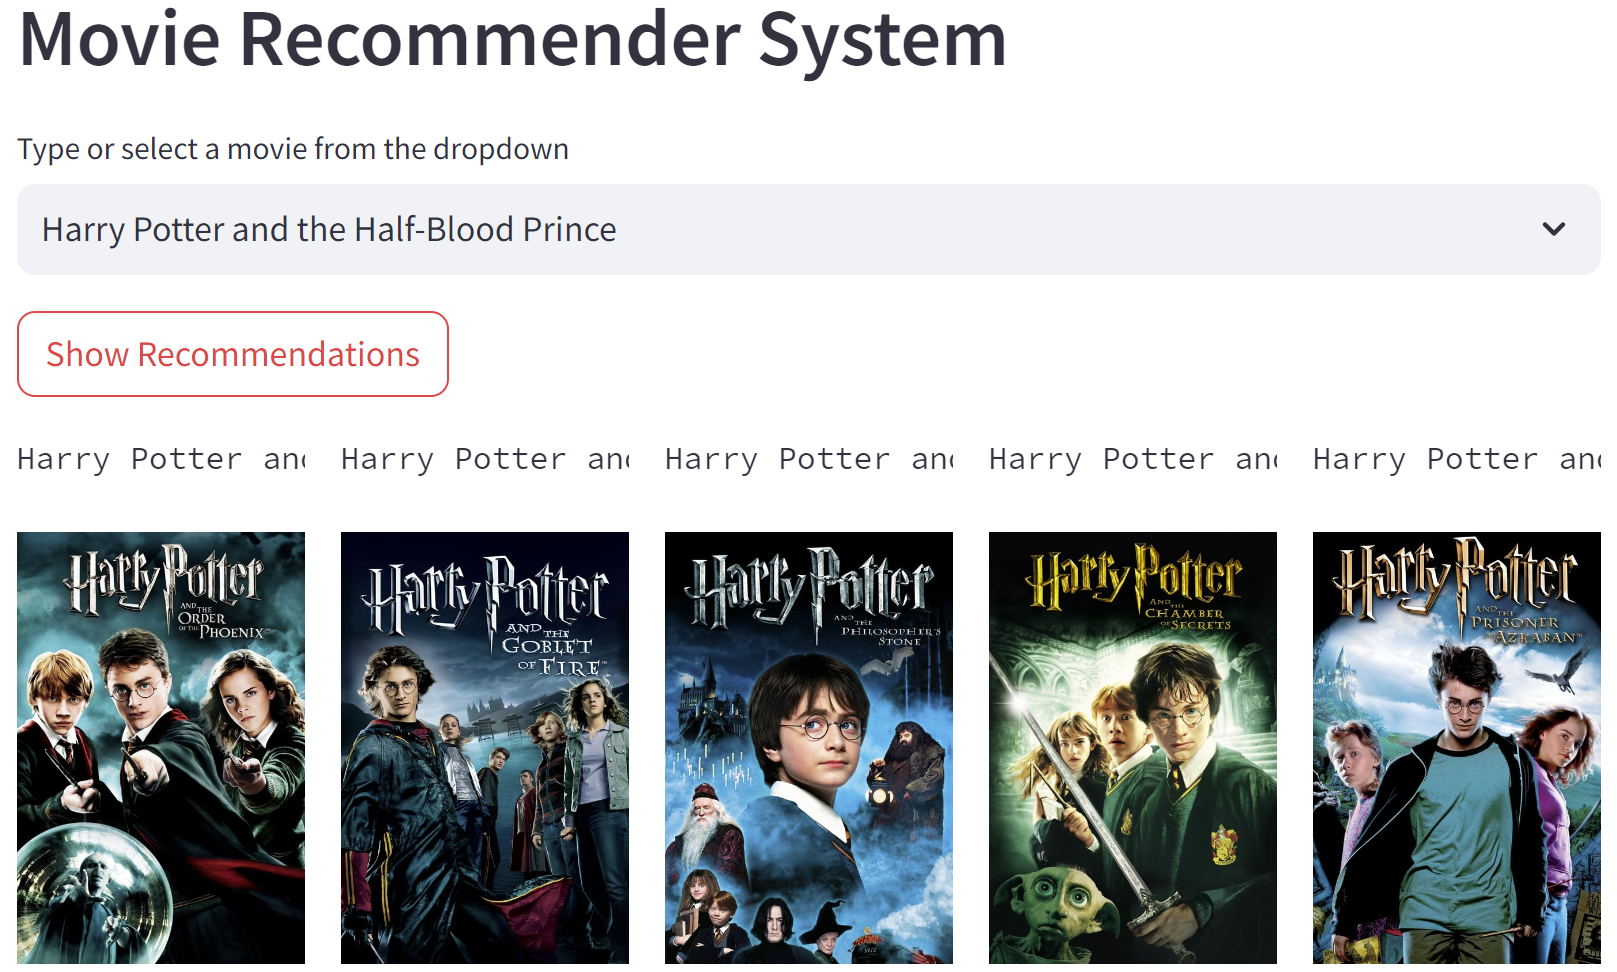

In [42]:
get_recommendations('The Hobbit: The Battle of the Five Armies', cosine_sim2)

98                     The Hobbit: An Unexpected Journey
22                   The Hobbit: The Desolation of Smaug
262    The Lord of the Rings: The Fellowship of the Ring
329        The Lord of the Rings: The Return of the King
330                The Lord of the Rings: The Two Towers
Name: title, dtype: object

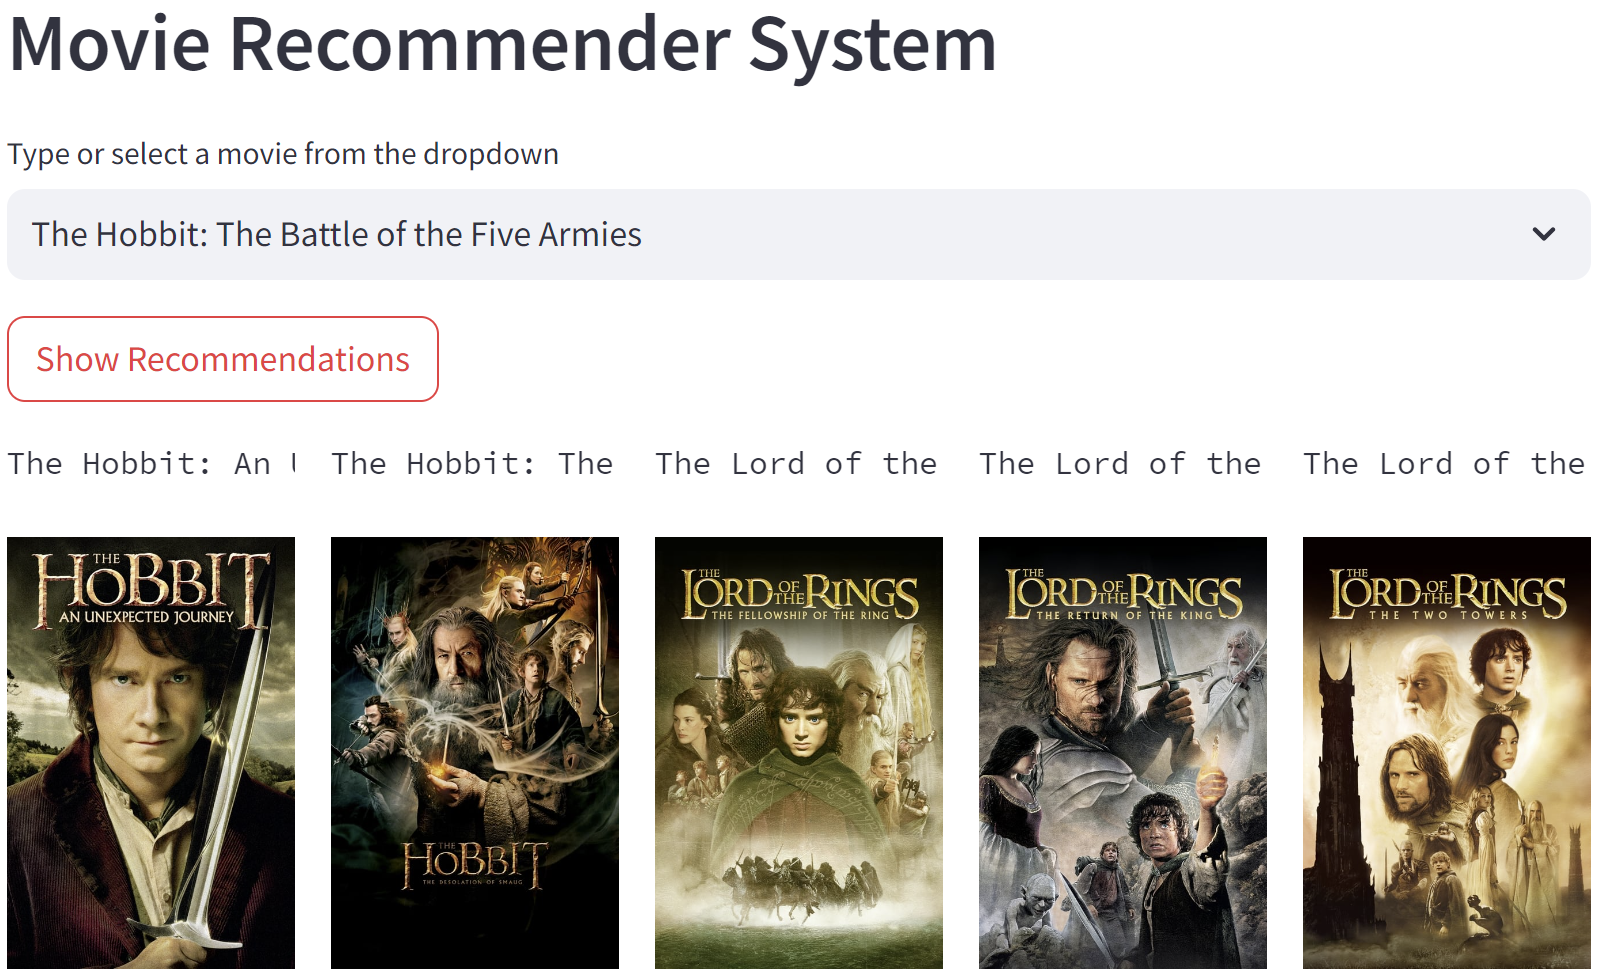

In [43]:
get_recommendations('The Avengers', cosine_sim2)

7                 Avengers: Age of Ultron
26             Captain America: Civil War
79                             Iron Man 2
169    Captain America: The First Avenger
174                   The Incredible Hulk
Name: title, dtype: object

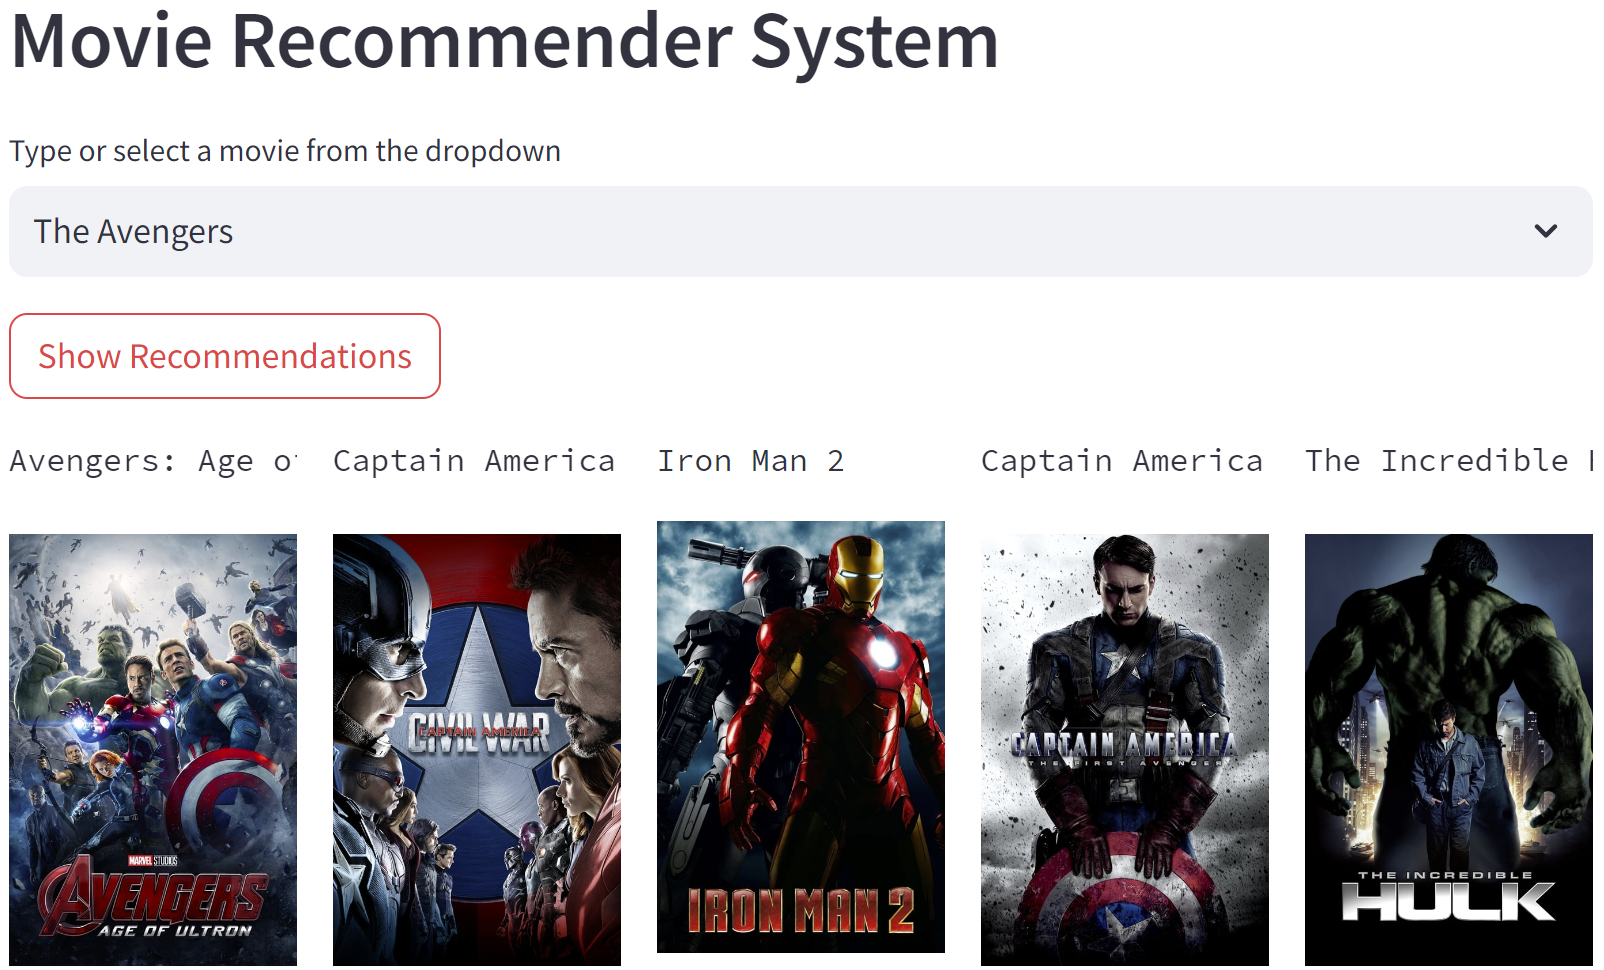

##### Conclusion - Metadata based recommender system gives us the most relevant recommendations compared to our previous models.